# 1. 문제 정의

* 문제 상황 : 농구 선수가 꿈인 디미는 자신이 어느 농구 포지션에 가장 적합한 능력을 갖고 있는지 궁금하다.

* 문제 정의 : 실제 농구 선수들의 시즌별 포지션, 경기 결과를 바탕으로 디미에게 가장 적합한 농구 포지션을 추천해 주자.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. 데이터 수집

* 데이터 수집 출처 : [NBA Players stats since 1950](https://www.kaggle.com/drgilermo/nba-players-stats?select=Seasons_Stats.csv)

* 파일명 : Seasons_Stats.csv

* 독립변수 : 53개

  * G : 게임 수
  * TS% : 유효 슛
  * ..
  * AST : 어시스트 수

* 종속변수 : Pos

In [ ]:
# 데이터 가져오기
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/datasets/Seasons_Stats.csv')
df.shape

(24691, 51)

In [ ]:
# 열 정보 살펴보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

# 3. 데이터 탐색 및 시각화

In [ ]:
# 포지션별 인원수 확인하기
df['Pos'].value_counts()

PF       4966
SG       4811
C        4759
SF       4699
PG       4648
G         139
F         123
F-C        81
G-F        79
F-G        60
C-F        35
C-PF       33
SF-SG      30
PG-SG      28
SG-PG      27
PF-C       27
SG-SF      26
PF-SF      25
SF-PF      21
SG-PF       3
C-SF        2
SF-PG       1
PG-SF       1
Name: Pos, dtype: int64

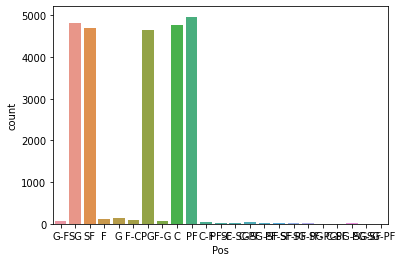

In [ ]:
# Position별 데이터 건수 확인하기
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Pos', data=df)

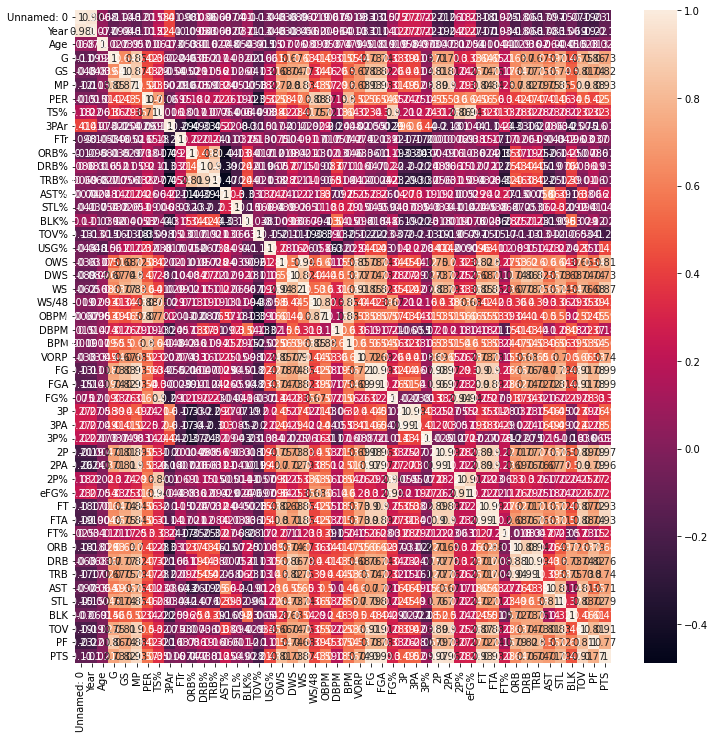

In [ ]:
# 특성별 상관관계 보기
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)
plt.show()

# 4. 데이터 전처리

* 결측치 확인 후 처리하기

* 불필요한 속성 삭제하기

* 범주형 데이터를 숫자형 데이터로 변환하기

* 특성 스케일링하기

In [ ]:
# 결측치 갯수 알아보기
df.isnull().sum()

Unnamed: 0       0
Year            67
Player          67
Pos             67
Age             75
Tm              67
G               67
GS            6458
MP             553
PER            590
TS%            153
3PAr          5852
FTr            166
ORB%          3899
DRB%          3899
TRB%          3120
AST%          2136
STL%          3899
BLK%          3899
TOV%          5109
USG%          5051
OWS            106
DWS            106
WS             106
WS/48          590
OBPM          3894
DBPM          3894
BPM           3894
VORP          3894
FG              67
FGA             67
FG%            166
3P            5764
3PA           5764
3P%           9275
2P              67
2PA             67
2P%            195
eFG%           166
FT              67
FTA             67
FT%            925
ORB           3894
DRB           3894
TRB            379
AST             67
STL           3894
BLK           3894
TOV           5046
PF              67
PTS             67
dtype: int64

In [ ]:
df['Year'].fillna(round(df['Year'].mean(),1),inplace=True)
# df['Player'].fillna(round(df['Player'].mean(),1),inplace=True)
# df['Pos'].fillna(round(df['Pos'].mean(),1),inplace=True)
# df['Age'].fillna(round(df['Age'].mean(),1),inplace=True)
# df['Tm'].fillna(round(df['Tm'].mean(),1),inplace=True)
df['G'].fillna(round(df['G'].mean(),1),inplace=True)
df['GS'].fillna(round(df['GS'].mean(),1),inplace=True)
df['MP'].fillna(round(df['MP'].mean(),1),inplace=True)
df['PER'].fillna(round(df['PER'].mean(),1),inplace=True)
df['TS%'].fillna(round(df['TS%'].mean(),1),inplace=True)
df['3PAr'].fillna(round(df['3PAr'].mean(),1),inplace=True)
df['FTr'].fillna(round(df['FTr'].mean(),1),inplace=True)
df['ORB%'].fillna(round(df['ORB%'].mean(),1),inplace=True)
df['DRB%'].fillna(round(df['DRB%'].mean(),1),inplace=True)
df['TRB%'].fillna(round(df['TRB%'].mean(),1),inplace=True)
df['AST%'].fillna(round(df['AST%'].mean(),1),inplace=True)
df['STL%'].fillna(round(df['STL%'].mean(),1),inplace=True)
df['BLK%'].fillna(round(df['BLK%'].mean(),1),inplace=True)
df['TOV%'].fillna(round(df['TOV%'].mean(),1),inplace=True)
df['USG%'].fillna(round(df['USG%'].mean(),1),inplace=True)
df['OWS'].fillna(round(df['OWS'].mean(),1),inplace=True)
df['DWS'].fillna(round(df['DWS'].mean(),1),inplace=True)
df['WS'].fillna(round(df['WS'].mean(),1),inplace=True)
df['WS/48'].fillna(round(df['WS/48'].mean(),1),inplace=True)
df['OBPM'].fillna(round(df['OBPM'].mean(),1),inplace=True)
df['DBPM'].fillna(round(df['DBPM'].mean(),1),inplace=True)
df['BPM'].fillna(round(df['BPM'].mean(),1),inplace=True)
df['VORP'].fillna(round(df['VORP'].mean(),1),inplace=True)
df['FG'].fillna(round(df['FG'].mean(),1),inplace=True)
df['FGA'].fillna(round(df['FGA'].mean(),1),inplace=True)
df['FG%'].fillna(round(df['FG%'].mean(),1),inplace=True)
df['3P'].fillna(round(df['3P'].mean(),1),inplace=True)
df['3PA'].fillna(round(df['3PA'].mean(),1),inplace=True)
df['3P%'].fillna(round(df['3P%'].mean(),1),inplace=True)
df['2P'].fillna(round(df['2P'].mean(),1),inplace=True)
df['2PA'].fillna(round(df['2PA'].mean(),1),inplace=True)
df['2P%'].fillna(round(df['2P%'].mean(),1),inplace=True)
df['eFG%'].fillna(round(df['eFG%'].mean(),1),inplace=True)
df['FT'].fillna(round(df['FT'].mean(),1),inplace=True)
df['FTA'].fillna(round(df['FTA'].mean(),1),inplace=True)
df['FT%'].fillna(round(df['FT%'].mean(),1),inplace=True)
df['ORB'].fillna(round(df['ORB'].mean(),1),inplace=True)
df['DRB'].fillna(round(df['DRB'].mean(),1),inplace=True)
df['TRB'].fillna(round(df['TRB'].mean(),1),inplace=True)
df['AST'].fillna(round(df['AST'].mean(),1),inplace=True)
df['STL'].fillna(round(df['STL'].mean(),1),inplace=True)
df['BLK'].fillna(round(df['BLK'].mean(),1),inplace=True)
df['TOV'].fillna(round(df['TOV'].mean(),1),inplace=True)
df['PF'].fillna(round(df['PF'].mean(),1),inplace=True)
df['PTS'].fillna(round(df['PTS'].mean(),1),inplace=True)

In [ ]:
df = df.astype({'Player':'str'})
df = df.astype({'Pos':'str'})
df = df.astype({'Age':'str'})
df = df.astype({'Tm':'str'})
df['Player'].dropna(inplace=True)
df['Pos'].dropna(inplace=True)
df['Age'].dropna(inplace=True)
df['Tm'].dropna(inplace=True)
df.drop(['Tm','Player'],axis='columns',inplace=True)
df.reset_index(inplace=True)

In [ ]:
pd.isna(df).any()
df[:] = np.nan_to_num(df)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mean(), inplace=True)

In [ ]:
df.drop('Age',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       24691 non-null  int64  
 1   Unnamed: 0  24691 non-null  int64  
 2   Year        24691 non-null  float64
 3   Pos         24691 non-null  object 
 4   G           24691 non-null  float64
 5   GS          24691 non-null  float64
 6   MP          24691 non-null  float64
 7   PER         24691 non-null  float64
 8   TS%         24691 non-null  float64
 9   3PAr        24691 non-null  float64
 10  FTr         24691 non-null  float64
 11  ORB%        24691 non-null  float64
 12  DRB%        24691 non-null  float64
 13  TRB%        24691 non-null  float64
 14  AST%        24691 non-null  float64
 15  STL%        24691 non-null  float64
 16  BLK%        24691 non-null  float64
 17  TOV%        24691 non-null  float64
 18  USG%        24691 non-null  float64
 19  OWS         24691 non-nul

In [ ]:
# 결측치 갯수 알아보기

df.isnull().sum()

index         0
Unnamed: 0    0
Year          0
Pos           0
G             0
GS            0
MP            0
PER           0
TS%           0
3PAr          0
FTr           0
ORB%          0
DRB%          0
TRB%          0
AST%          0
STL%          0
BLK%          0
TOV%          0
USG%          0
OWS           0
DWS           0
WS            0
WS/48         0
OBPM          0
DBPM          0
BPM           0
VORP          0
FG            0
FGA           0
FG%           0
3P            0
3PA           0
3P%           0
2P            0
2PA           0
2P%           0
eFG%          0
FT            0
FTA           0
FT%           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
dtype: int64

In [ ]:
# 결측치 삭제하기
df.dropna(inplace=True)
df.isnull().sum()

index         0
Unnamed: 0    0
Year          0
Pos           0
G             0
GS            0
MP            0
PER           0
TS%           0
3PAr          0
FTr           0
ORB%          0
DRB%          0
TRB%          0
AST%          0
STL%          0
BLK%          0
TOV%          0
USG%          0
OWS           0
DWS           0
WS            0
WS/48         0
OBPM          0
DBPM          0
BPM           0
VORP          0
FG            0
FGA           0
FG%           0
3P            0
3PA           0
3P%           0
2P            0
2PA           0
2P%           0
eFG%          0
FT            0
FTA           0
FT%           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
dtype: int64

# 5. 모델 학습 및 평가

* 머신러닝 알고리즘 선택 : 결정트리, 랜덤포레스트

* 학습 후 특성 중요도 확인하기

* 분류 모델 평가 지표 : 정확도(Accuracy)

In [ ]:
# 데이터 분리하기
from sklearn.model_selection import train_test_split

X_data = df.drop('Pos', axis=1).to_numpy()  # to_numpy()를 안해주면 y_test 데이터가 Series로 리턴됨
y_data = df['Pos'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19752, 48), (4939, 48), (19752,), (4939,))

In [ ]:
# 사이킷런 알고리즘 import하기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Decision Tree로 학습 후 평가하기
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

1.0
0.5229803603968415


In [ ]:
# Decision Tree 과대적합 막기
params = {
    'max_depth': [4, 6, 8, 10, 12, 14],
    'min_samples_split': [2, 3, 4, 5]
}
dt = DecisionTreeClassifier()

gs = GridSearchCV(dt, param_grid=params, n_jobs=-1)

gs.fit(X_train, y_train)

print('best parameter:', gs.best_params_)
print('best score:', gs.best_score_)
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


best parameter: {'max_depth': 8, 'min_samples_split': 3}
best score: 0.5691574060724893
0.6302146618063994
0.5691435513261794


In [ ]:
# Random Forest로 학습 후 평가하기
rf = RandomForestClassifier()

gs2 = GridSearchCV(rf, param_grid=params, n_jobs=-1)

gs2.fit(X_train, y_train)
 
print('best parameter:', gs2.best_params_)
print('best score:', gs2.best_score_)
print(gs2.score(X_train, y_train))
print(gs2.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


best parameter: {'max_depth': 12, 'min_samples_split': 3}
best score: 0.622467825802793
0.863102470635885
0.621178376189512


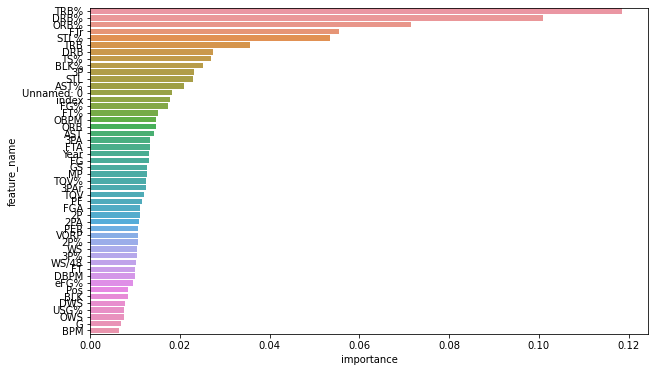

In [ ]:
# 특성 중요도 시각화하기
df2 = pd.DataFrame({
    'feature_name' : df.columns[:48],
    'importance' : gs2.best_estimator_.feature_importances_
})

df2 = df2.sort_values(by=['importance'], ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(y=df2['feature_name'], x=df2['importance'])

TRB% : Total rebound percentage

DRB% : Defensive Rebound Percentage

ORB% : Offensive Rebound Percentage

FTr : Free Throw Rate

STL% : Steal Percentage

TRB : Total Rebounds

DRB : Defensive Rebounds

BLK% : Block Percentage

TS% : True Shooting Percentage

AST% : Assist Percentage

In [ ]:
len(df2['feature_name'])

48

In [ ]:
len(gs2.best_estimator_.feature_importances_)

48

In [ ]:
df['Pos'].value_counts()

PF       4966
SG       4811
C        4759
SF       4699
PG       4648
G         139
F         123
F-C        81
G-F        79
nan        67
F-G        60
C-F        35
C-PF       33
SF-SG      30
PG-SG      28
SG-PG      27
PF-C       27
SG-SF      26
PF-SF      25
SF-PF      21
SG-PF       3
C-SF        2
SF-PG       1
PG-SF       1
Name: Pos, dtype: int64

# 6. 모델 개선

* 개선1 : 중요한 특성 10개만 골라서 학습시키기 -> 처음에서 0.59로 증가

* 개선2 : 정답(레이블) 갯수 줄여보기 (4000 이상인 Pos만 고르기) -> 0.636으로 올라감

In [ ]:
# 개선1 : 중요한 특성 10개만 고르기
X_data_new = df[['TRB%', 'DRB%', 'ORB%','FTr', 'STL%', 'TRB', 'DRB', 'BLK%', 'TS%', 'AST%' ]].to_numpy()
y_data_new = df['Pos'].to_numpy()

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_data_new, y_data_new, test_size=0.2)
X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape
#

((19752, 10), (4939, 10), (19752,), (4939,))

In [ ]:
# Random Forest로 학습 후 평가하기
rf = RandomForestClassifier()

gs2 = GridSearchCV(rf, param_grid=params, n_jobs=-1)

gs2.fit(X_train_new, y_train_new)
 
print('best parameter:', gs2.best_params_)
print('best score:', gs2.best_score_)
print(gs2.score(X_train_new, y_train_new))
print(gs2.score(X_test_new, y_test_new))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


best parameter: {'max_depth': 12, 'min_samples_split': 4}
best score: 0.5913826270548395
0.7781490481976508
0.5950597286900182


In [ ]:
df['Pos'].value_counts()

PF       4966
SG       4811
C        4759
SF       4699
PG       4648
G         139
F         123
F-C        81
G-F        79
nan        67
F-G        60
C-F        35
C-PF       33
SF-SG      30
PG-SG      28
SG-PG      27
PF-C       27
SG-SF      26
PF-SF      25
SF-PF      21
SG-PF       3
C-SF        2
SF-PG       1
PG-SF       1
Name: Pos, dtype: int64

In [ ]:
# 개선2 : 정답(레이블) 갯수 줄여보기
# CB, ST, CAM, GK, RM, CDM, CM
df_new = df[(df['Pos'] == 'PF') | (df['Pos'] == 'SG') | (df['Pos'] == 'C') | (df['Pos'] == 'SF') | (df['Pos'] == 'PG')]
df_new.shape

(23883, 49)

In [ ]:
# 포지션별 인원수 확인하기
df_new['Pos'].value_counts()

PF    4966
SG    4811
C     4759
SF    4699
PG    4648
Name: Pos, dtype: int64

In [ ]:
# 데이터 분리하기
X_data_new = df_new.drop('Pos', axis=1).to_numpy()
y_data_new = df_new['Pos'].to_numpy()

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_data_new, y_data_new, test_size=0.2)
X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape

((19106, 48), (4777, 48), (19106,), (4777,))

In [ ]:
# Random Forest로 학습 후 평가하기
rf = RandomForestClassifier()

gs2 = GridSearchCV(rf, param_grid=params, n_jobs=-1)

gs2.fit(X_train_new, y_train_new)
 
print('best parameter:', gs2.best_params_)
print('best score:', gs2.best_score_)
print(gs2.score(X_train_new, y_train_new))
print(gs2.score(X_test_new, y_test_new))

best parameter: {'max_depth': 12, 'min_samples_split': 2}
best score: 0.6418926856471254
0.8827070030356956
0.6363826669457818


# 7. 문제 해결

* 디미의 능력치를 입력하여 예측한 결과 C에 적합하다는 예측 결과가 나옴

In [ ]:
# 디미 능력치를 입력하여 최적의 포지션 찾기
estimator = gs2.best_estimator_
estimator.predict([[68., 66., 65., 75., 64., 65., 6., 0., 0., 73., 51., 50., 62.,
       74., 6., 71., 4., 66., 64., 7., 0., 7., 71.,68., 66., 6., 75., 0., 65., 63., 57., 74., 73., 51., 50., 62.,
       74., 67., 1., 64., 66., 65., 73., 73., 0., 71.,60.,6.]])

array(['C'], dtype=object)

# 8. 평가

* 프로젝트를 통해 배운 점, 아쉬운 점 등을 작성합니다.
    1. 머신러닝 첫 수업부터 두번째 수업까지 듣지 못해 내용을 확실히 알 수 없어 아쉬웠음.
    2. 데이터가 많은데 스코어가 0.63정도밖에 안나와서 아쉬움. 여러가지 변수와 파라미터들을 건드려보았는데, 오히려 스코어가 떨어졌음.